In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('dark_background')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\nhatp\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a file called `data`.

In [2]:
# Import train & test data 
train = pd.read_csv(r'C:\Users\nhatp\Documents\Python Projects\Titanic\train.csv')
test = pd.read_csv(r'C:\Users\nhatp\Documents\Python Projects\Titanic\test.csv')
gender_submission = pd.read_csv(r'C:\Users\nhatp\Documents\Python Projects\Titanic\gender_submission.csv')


In [3]:
# View the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:ylabel='Frequency'>

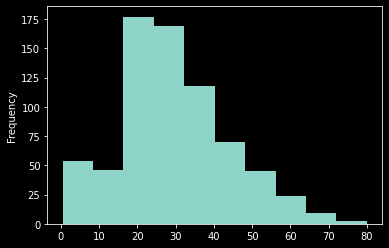

In [4]:
train.Age.plot.hist()

In [5]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

<AxesSubplot:>

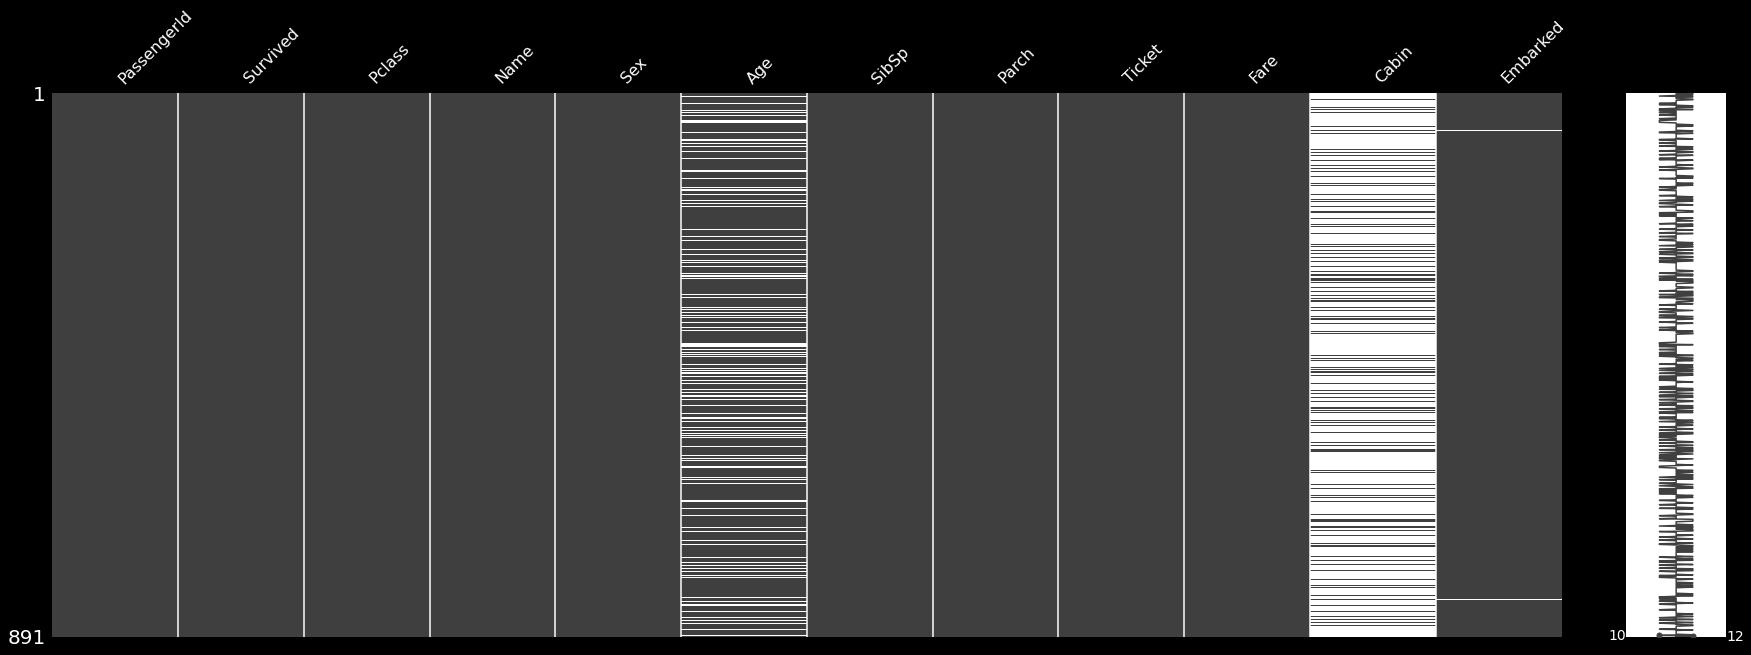

In [8]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [9]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [10]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [11]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


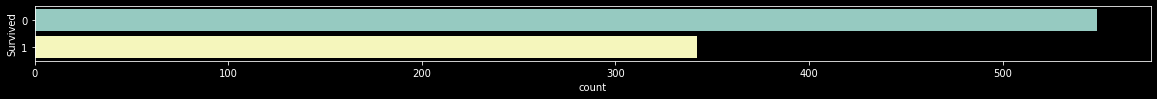

In [13]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [14]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [15]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [16]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

<AxesSubplot:xlabel='Pclass', ylabel='Density'>

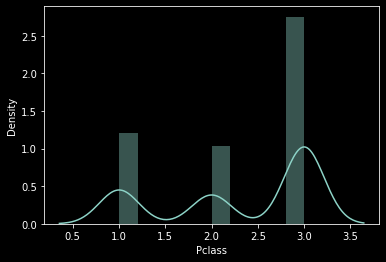

In [17]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [18]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

In [19]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name
    
Description: The name of the passenger.

In [20]:
# How many different names are there?
train.Name.value_counts()

Abelson, Mrs. Samuel (Hannah Wizosky)      1
Padro y Manent, Mr. Julian                 1
Panula, Master. Juha Niilo                 1
Ford, Mrs. Edward (Margaret Ann Watson)    1
Sharp, Mr. Percival James R                1
                                          ..
Panula, Master. Urho Abraham               1
Todoroff, Mr. Lalio                        1
Emanuel, Miss. Virginia Ethel              1
Vande Velde, Mr. Johannes Joseph           1
Chaffee, Mr. Herbert Fuller                1
Name: Name, Length: 891, dtype: int64

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

**Note:** Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

### Feature: Sex

Description: The sex of the passenger (male or female).

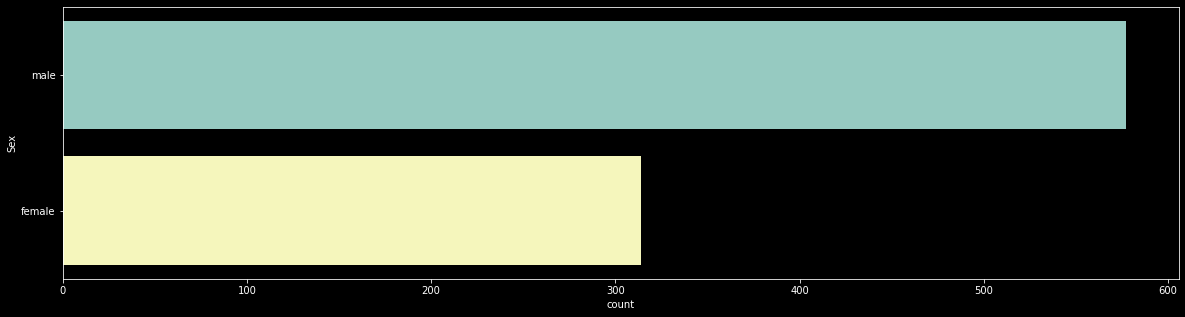

In [21]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [22]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

Since this is already binary variable (male or female), let's add it straight to our subset dataframes.

In [23]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [24]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

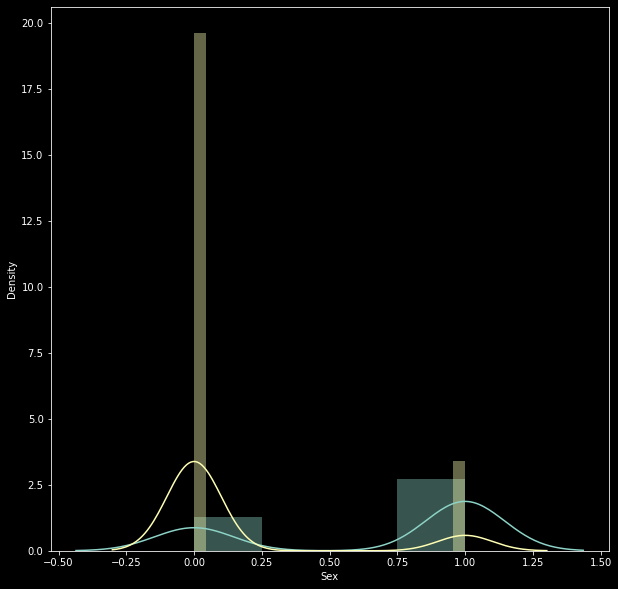

In [25]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

Not many people survived. But of those who did, more were female.

### Feature: Age

Description: The age of the passenger.

In [26]:
# How many missing values does age have?
train.Age.isnull().sum()

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date.


In [27]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
# df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
# df_con['Age'] = train['Age'] # non-bucketed

**Challenge:** How would you fill the missing variables in the `Age` column?

#### Function to create count and distribution visualisations

In [28]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [29]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [30]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Let's add SibSp to our subset dataframes and view the distributions.

In [31]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

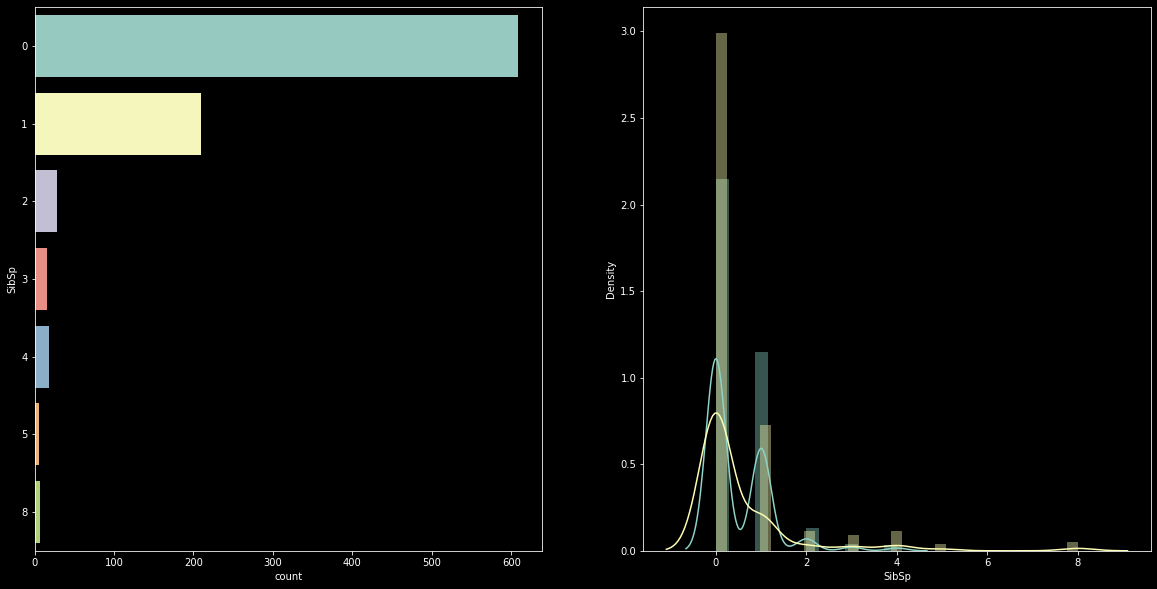

In [32]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

What does the graph on the right tell us?

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [33]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [34]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

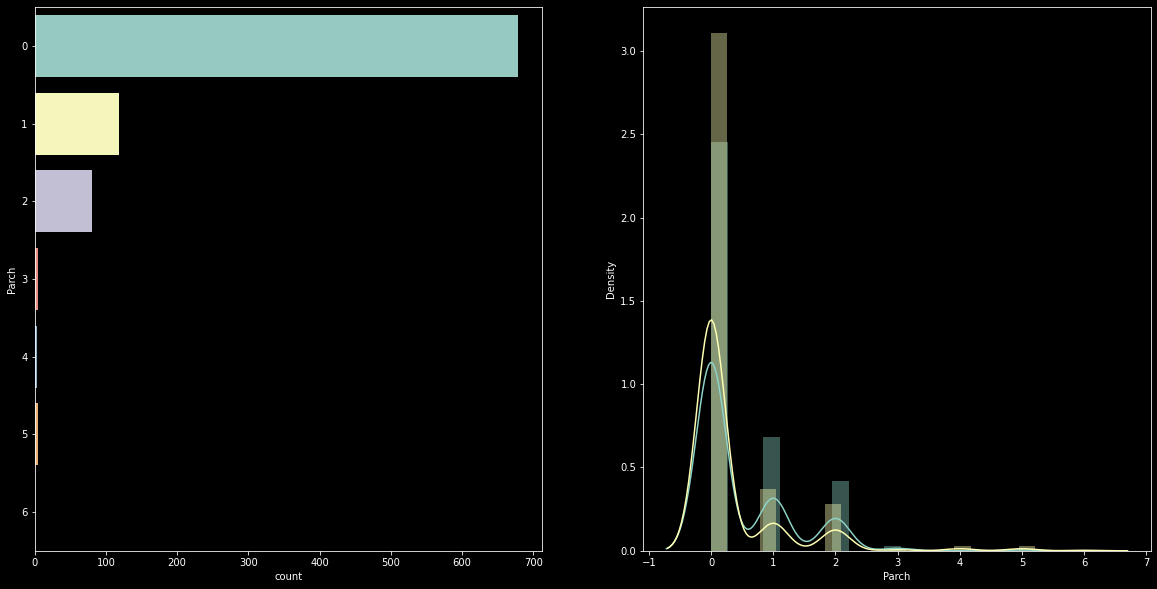

In [36]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

What does the graph on the right tell us about `Parch`?

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [39]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

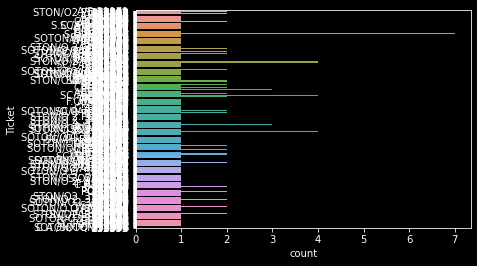

In [40]:
# How many kinds of ticket are there?
sns.countplot(y="Ticket", data=train);

That doesn't look too good, what about another way of looking at it?

In [41]:
# How many kinds of ticket are there?
train.Ticket.value_counts()

CA. 2343    7
347082      7
1601        7
CA 2144     6
347088      6
           ..
C 4001      1
113501      1
330958      1
2650        1
349236      1
Name: Ticket, Length: 681, dtype: int64

In [42]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use `Ticket` in our subset dataframes.

There may be some way to reduce this down. 

**Challenge:** How could you reduce the Ticket feature? Is it even possible?

*Hint:* It may be similar to what you could do with Name.

### Feature: Fare

Description: How much the ticket cost.

In [43]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

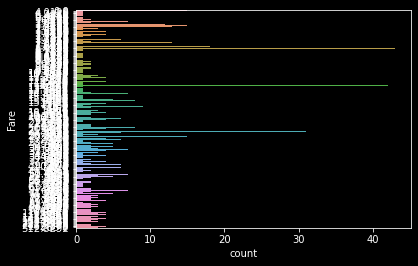

In [44]:
# How many different values of Fare are there?
sns.countplot(y="Fare", data=train);

In [45]:
# What kind of variable is Fare?
train.Fare.dtype

dtype('float64')

In [46]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [47]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [48]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

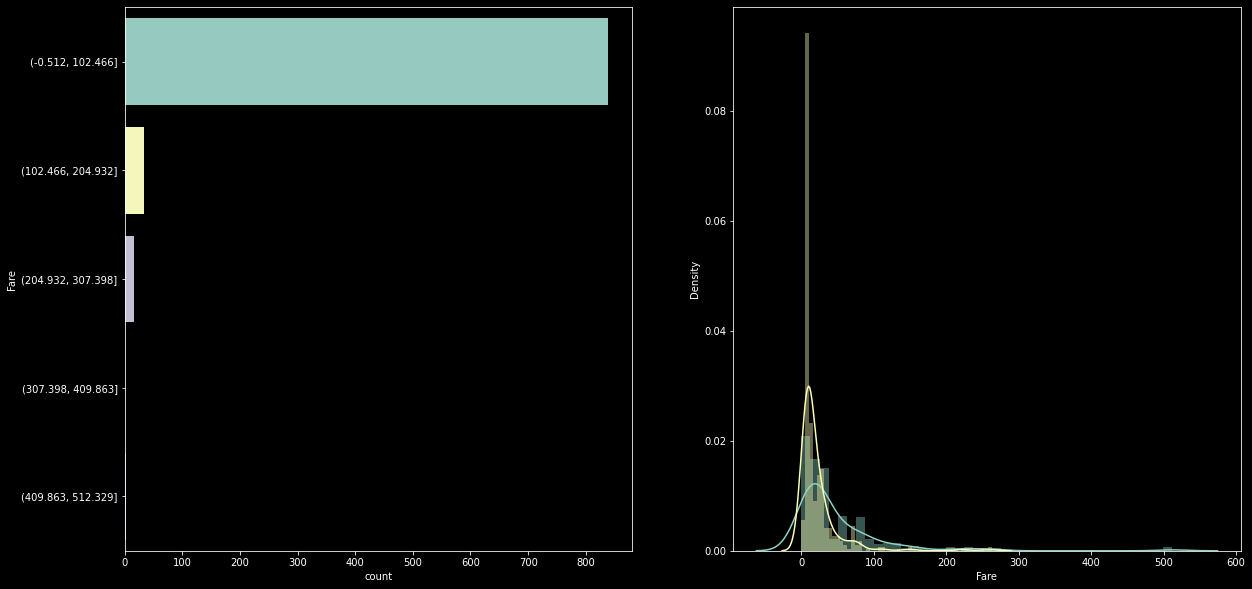

In [49]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

**Challenge:** How would you change the Fare bins?

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [50]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
# What do the Cabin values look like?
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
D              3
              ..
B101           1
B38            1
E58            1
C70            1
A16            1
Name: Cabin, Length: 147, dtype: int64

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

But how could you modify cabin to be more usable?

What could you do about the missing values?

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [53]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [54]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

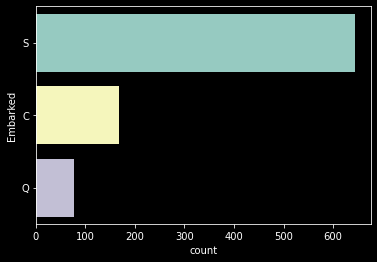

In [55]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [56]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

In [57]:
# Remove Embarked rows which are missing values
print(len(df_con))
df_con = df_con.dropna(subset=['Embarked'])
df_bin = df_bin.dropna(subset=['Embarked'])
print(len(df_con))

891
889


We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.

## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [58]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [59]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [60]:
df_con.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S
5,0,3,male,0,0,8.4583,Q
6,0,1,male,0,0,51.8625,S
7,0,3,male,3,1,21.0750,S
8,1,3,female,0,2,11.1333,S
9,1,2,female,1,0,30.0708,C


**Update:** The original version of this notebook used the `LabelEncoder()` function for encoding `df_con_enc`. However, as Tomáš pointed out, OneHotEncoder is better to use.
    
Check this article for more details: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [61]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [62]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [63]:
# Let's look at df_con_enc
df_con_enc.head(20)

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,0,0,8.4583,0,1,0,0,1,0,0,1
6,0,0,0,51.8625,0,0,1,0,1,1,0,0
7,0,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,1,0,30.0708,1,0,0,1,0,0,1,0


## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's seperate the data

In [64]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [65]:
selected_df.head()

,Survived,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,0,8.0500,0,0,1,0,1,0,0,1


In [66]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [67]:
# Shape of the data (without labels)
X_train.shape

(889, 11)

In [68]:
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [69]:
# Shape of the labels
y_train.shape

(889,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [70]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

### Logistic Regression

In [71]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.98
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:03.725117


### K-Nearest Neighbours

In [72]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.46
Accuracy CV 10-Fold: 76.72
Running Time: 0:00:00.210300


### Gaussian Naive Bayes

In [73]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.52
Accuracy CV 10-Fold: 77.95
Running Time: 0:00:00.086708


### Linear Support Vector Machines (SVC)

In [74]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 79.64
Accuracy CV 10-Fold: 77.17
Running Time: 0:00:00.377741


### Stochastic Gradient Descent

In [75]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 73.57
Accuracy CV 10-Fold: 72.22
Running Time: 0:00:00.065781


### Decision Tree Classifier

In [76]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 92.46
Accuracy CV 10-Fold: 80.76
Running Time: 0:00:00.078740


### Gradient Boost Trees

In [77]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.61
Accuracy CV 10-Fold: 80.65
Running Time: 0:00:00.624915


### CatBoost Algorithm
CatBoost is a state-of-the-art open-source gradient boosting on decision trees library.

It's simple and easy to use. And is now regularly one of my go-to algorithms for any kind of machine learning task.

For more on CatBoost and the methods it uses to deal with categorical variables, check out the [CatBoost docs](https://catboost.ai/).

In [78]:
# View the data for the CatBoost model
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [79]:
# View the labels for the CatBoost model
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [80]:
# Define the categorical features for the CatBoost model
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

This means Catboost has picked up that all variables except `Fare` can be treated as categorical.

In [81]:
# Use the CatBoost Pool() function to pool together the training data and categorical feature labels
train_pool = Pool(X_train, 
                  y_train,
                  cat_features)

In [82]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [83]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009797
0:	learn: 0.6862830	total: 184ms	remaining: 3m 3s
1:	learn: 0.6809444	total: 211ms	remaining: 1m 45s
2:	learn: 0.6751692	total: 240ms	remaining: 1m 19s
3:	learn: 0.6689060	total: 270ms	remaining: 1m 7s
4:	learn: 0.6632144	total: 300ms	remaining: 59.7s
5:	learn: 0.6576488	total: 324ms	remaining: 53.6s
6:	learn: 0.6544441	total: 334ms	remaining: 47.4s
7:	learn: 0.6490635	total: 366ms	remaining: 45.4s
8:	learn: 0.6443241	total: 399ms	remaining: 44s
9:	learn: 0.6395935	total: 429ms	remaining: 42.5s
10:	learn: 0.6345186	total: 454ms	remaining: 40.8s
11:	learn: 0.6305316	total: 484ms	remaining: 39.8s
12:	learn: 0.6275610	total: 499ms	remaining: 37.9s
13:	learn: 0.6225020	total: 528ms	remaining: 37.2s
14:	learn: 0.6179503	total: 559ms	remaining: 36.7s
15:	learn: 0.6140480	total: 573ms	remaining: 35.2s
16:	learn: 0.6100034	total: 598ms	remaining: 34.6s
17:	learn: 0.6049646	total: 634ms	remaining: 34.6s
18:	learn: 0.6025760	total: 644ms	remaining: 33.3s
19:	learn: 

167:	learn: 0.4222141	total: 4.83s	remaining: 23.9s
168:	learn: 0.4219366	total: 4.86s	remaining: 23.9s
169:	learn: 0.4216245	total: 4.88s	remaining: 23.8s
170:	learn: 0.4213900	total: 4.91s	remaining: 23.8s
171:	learn: 0.4210836	total: 4.94s	remaining: 23.8s
172:	learn: 0.4208199	total: 4.96s	remaining: 23.7s
173:	learn: 0.4206421	total: 4.99s	remaining: 23.7s
174:	learn: 0.4201114	total: 5.02s	remaining: 23.6s
175:	learn: 0.4198212	total: 5.05s	remaining: 23.6s
176:	learn: 0.4195834	total: 5.08s	remaining: 23.6s
177:	learn: 0.4195685	total: 5.08s	remaining: 23.5s
178:	learn: 0.4194809	total: 5.09s	remaining: 23.4s
179:	learn: 0.4191368	total: 5.12s	remaining: 23.3s
180:	learn: 0.4185960	total: 5.14s	remaining: 23.3s
181:	learn: 0.4184559	total: 5.17s	remaining: 23.2s
182:	learn: 0.4180542	total: 5.2s	remaining: 23.2s
183:	learn: 0.4178579	total: 5.22s	remaining: 23.2s
184:	learn: 0.4175684	total: 5.25s	remaining: 23.1s
185:	learn: 0.4173356	total: 5.27s	remaining: 23.1s
186:	learn: 0

330:	learn: 0.3925085	total: 9s	remaining: 18.2s
331:	learn: 0.3921820	total: 9.02s	remaining: 18.2s
332:	learn: 0.3920570	total: 9.04s	remaining: 18.1s
333:	learn: 0.3918707	total: 9.07s	remaining: 18.1s
334:	learn: 0.3917635	total: 9.12s	remaining: 18.1s
335:	learn: 0.3916127	total: 9.15s	remaining: 18.1s
336:	learn: 0.3914735	total: 9.17s	remaining: 18s
337:	learn: 0.3914486	total: 9.21s	remaining: 18s
338:	learn: 0.3912764	total: 9.24s	remaining: 18s
339:	learn: 0.3911365	total: 9.27s	remaining: 18s
340:	learn: 0.3910828	total: 9.3s	remaining: 18s
341:	learn: 0.3910413	total: 9.33s	remaining: 18s
342:	learn: 0.3910351	total: 9.35s	remaining: 17.9s
343:	learn: 0.3908388	total: 9.38s	remaining: 17.9s
344:	learn: 0.3907468	total: 9.41s	remaining: 17.9s
345:	learn: 0.3905556	total: 9.44s	remaining: 17.8s
346:	learn: 0.3905329	total: 9.49s	remaining: 17.9s
347:	learn: 0.3904624	total: 9.52s	remaining: 17.8s
348:	learn: 0.3904620	total: 9.53s	remaining: 17.8s
349:	learn: 0.3901004	total:

494:	learn: 0.3771236	total: 13.5s	remaining: 13.7s
495:	learn: 0.3770363	total: 13.5s	remaining: 13.7s
496:	learn: 0.3769634	total: 13.5s	remaining: 13.7s
497:	learn: 0.3769625	total: 13.5s	remaining: 13.6s
498:	learn: 0.3768613	total: 13.5s	remaining: 13.6s
499:	learn: 0.3768611	total: 13.6s	remaining: 13.6s
500:	learn: 0.3768153	total: 13.6s	remaining: 13.5s
501:	learn: 0.3767849	total: 13.6s	remaining: 13.5s
502:	learn: 0.3765500	total: 13.7s	remaining: 13.5s
503:	learn: 0.3763980	total: 13.7s	remaining: 13.5s
504:	learn: 0.3763692	total: 13.7s	remaining: 13.4s
505:	learn: 0.3763085	total: 13.7s	remaining: 13.4s
506:	learn: 0.3761631	total: 13.8s	remaining: 13.4s
507:	learn: 0.3760934	total: 13.8s	remaining: 13.4s
508:	learn: 0.3760498	total: 13.8s	remaining: 13.3s
509:	learn: 0.3760150	total: 13.8s	remaining: 13.3s
510:	learn: 0.3759970	total: 13.9s	remaining: 13.3s
511:	learn: 0.3759798	total: 13.9s	remaining: 13.2s
512:	learn: 0.3759568	total: 13.9s	remaining: 13.2s
513:	learn: 

657:	learn: 0.3642143	total: 17.7s	remaining: 9.22s
658:	learn: 0.3641970	total: 17.8s	remaining: 9.2s
659:	learn: 0.3641835	total: 17.8s	remaining: 9.17s
660:	learn: 0.3641783	total: 17.8s	remaining: 9.15s
661:	learn: 0.3640790	total: 17.9s	remaining: 9.12s
662:	learn: 0.3640602	total: 17.9s	remaining: 9.1s
663:	learn: 0.3639463	total: 17.9s	remaining: 9.07s
664:	learn: 0.3639302	total: 18s	remaining: 9.04s
665:	learn: 0.3638903	total: 18s	remaining: 9.02s
666:	learn: 0.3637239	total: 18s	remaining: 8.99s
667:	learn: 0.3635881	total: 18.1s	remaining: 8.97s
668:	learn: 0.3634772	total: 18.1s	remaining: 8.95s
669:	learn: 0.3634068	total: 18.1s	remaining: 8.92s
670:	learn: 0.3633759	total: 18.2s	remaining: 8.9s
671:	learn: 0.3631802	total: 18.2s	remaining: 8.88s
672:	learn: 0.3631026	total: 18.2s	remaining: 8.86s
673:	learn: 0.3630056	total: 18.3s	remaining: 8.83s
674:	learn: 0.3628564	total: 18.3s	remaining: 8.8s
675:	learn: 0.3628277	total: 18.3s	remaining: 8.79s
676:	learn: 0.3628277	

822:	learn: 0.3531526	total: 22.2s	remaining: 4.78s
823:	learn: 0.3530893	total: 22.3s	remaining: 4.75s
824:	learn: 0.3528000	total: 22.3s	remaining: 4.73s
825:	learn: 0.3527557	total: 22.3s	remaining: 4.7s
826:	learn: 0.3527494	total: 22.3s	remaining: 4.67s
827:	learn: 0.3527097	total: 22.4s	remaining: 4.65s
828:	learn: 0.3525818	total: 22.4s	remaining: 4.62s
829:	learn: 0.3525719	total: 22.4s	remaining: 4.59s
830:	learn: 0.3523327	total: 22.5s	remaining: 4.57s
831:	learn: 0.3523023	total: 22.5s	remaining: 4.55s
832:	learn: 0.3522949	total: 22.5s	remaining: 4.52s
833:	learn: 0.3521358	total: 22.6s	remaining: 4.49s
834:	learn: 0.3521053	total: 22.6s	remaining: 4.46s
835:	learn: 0.3520985	total: 22.6s	remaining: 4.43s
836:	learn: 0.3520746	total: 22.6s	remaining: 4.41s
837:	learn: 0.3519963	total: 22.7s	remaining: 4.38s
838:	learn: 0.3519587	total: 22.7s	remaining: 4.35s
839:	learn: 0.3518946	total: 22.7s	remaining: 4.33s
840:	learn: 0.3518871	total: 22.7s	remaining: 4.3s
841:	learn: 0.

986:	learn: 0.3405983	total: 26.5s	remaining: 350ms
987:	learn: 0.3404887	total: 26.6s	remaining: 323ms
988:	learn: 0.3404766	total: 26.6s	remaining: 296ms
989:	learn: 0.3404401	total: 26.6s	remaining: 269ms
990:	learn: 0.3403797	total: 26.6s	remaining: 242ms
991:	learn: 0.3403515	total: 26.7s	remaining: 216ms
992:	learn: 0.3402624	total: 26.8s	remaining: 189ms
993:	learn: 0.3402175	total: 26.8s	remaining: 162ms
994:	learn: 0.3399939	total: 26.8s	remaining: 135ms
995:	learn: 0.3399342	total: 26.9s	remaining: 108ms
996:	learn: 0.3398669	total: 26.9s	remaining: 80.9ms
997:	learn: 0.3398219	total: 26.9s	remaining: 53.9ms
998:	learn: 0.3397748	total: 26.9s	remaining: 27ms
999:	learn: 0.3396214	total: 27s	remaining: 0us


### Perform CatBoost cross-validation

In [84]:
# How long will this take?
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6746718	test: 0.6751020	best: 0.6751020 (0)
1:	learn: 0.6573540	test: 0.6583602	best: 0.6583602 (1)
2:	learn: 0.6408329	test: 0.6429257	best: 0.6429257 (2)
3:	learn: 0.6253924	test: 0.6283059	best: 0.6283059 (3)
4:	learn: 0.6114190	test: 0.6150989	best: 0.6150989 (4)
5:	learn: 0.6004513	test: 0.6048524	best: 0.6048524 (5)
6:	learn: 0.5900482	test: 0.5949158	best: 0.5949158 (6)
7:	learn: 0.5800356	test: 0.5853301	best: 0.5853301 (7)
8:	learn: 0.5702086	test: 0.5757925	best: 0.5757925 (8)
9:	learn: 0.5612227	test: 0.5675857	best: 0.5675857 (9)
10:	learn: 0.5522686	test: 0.5589941	best: 0.5589941 (10)
11:	learn: 0.5447302	test: 0.5517930	best: 0.5517930 (11)
12:	learn: 0.5377424	test: 0.5449873	best: 0.5449873 (12)
13:	learn: 0.5305336	test: 0.5382423	best: 0.5382423 (13)
14:	learn: 0.5241296	test: 0.5323280	best: 0.5323280 (14)
15:	learn: 0.5171284	test: 0.5265741	best: 0.5265741 (15)
16:	learn: 0.5113308	test: 0.5214578	best: 0.5214578 (16)
17:	learn: 0.5063945	test: 0.51688

140:	learn: 0.3786555	test: 0.4378720	best: 0.4375885 (133)
141:	learn: 0.3784076	test: 0.4378774	best: 0.4375885 (133)
142:	learn: 0.3780534	test: 0.4378525	best: 0.4375885 (133)
143:	learn: 0.3777646	test: 0.4376841	best: 0.4375885 (133)
144:	learn: 0.3775321	test: 0.4378089	best: 0.4375885 (133)
145:	learn: 0.3772125	test: 0.4377624	best: 0.4375885 (133)
146:	learn: 0.3769816	test: 0.4376400	best: 0.4375885 (133)
147:	learn: 0.3767073	test: 0.4376571	best: 0.4375885 (133)
148:	learn: 0.3765399	test: 0.4376666	best: 0.4375885 (133)
149:	learn: 0.3762756	test: 0.4376520	best: 0.4375885 (133)
150:	learn: 0.3761288	test: 0.4377161	best: 0.4375885 (133)
151:	learn: 0.3759425	test: 0.4377006	best: 0.4375885 (133)
152:	learn: 0.3756349	test: 0.4378041	best: 0.4375885 (133)
153:	learn: 0.3754100	test: 0.4378911	best: 0.4375885 (133)
154:	learn: 0.3751414	test: 0.4379486	best: 0.4375885 (133)
155:	learn: 0.3748791	test: 0.4380754	best: 0.4375885 (133)
156:	learn: 0.3746241	test: 0.4381365	be

283:	learn: 0.3429632	test: 0.4383874	best: 0.4375885 (133)
284:	learn: 0.3427279	test: 0.4383233	best: 0.4375885 (133)
285:	learn: 0.3423478	test: 0.4382080	best: 0.4375885 (133)
286:	learn: 0.3421475	test: 0.4380605	best: 0.4375885 (133)
287:	learn: 0.3419452	test: 0.4379682	best: 0.4375885 (133)
288:	learn: 0.3415879	test: 0.4380046	best: 0.4375885 (133)
289:	learn: 0.3413856	test: 0.4380394	best: 0.4375885 (133)
290:	learn: 0.3411096	test: 0.4381882	best: 0.4375885 (133)
291:	learn: 0.3408025	test: 0.4382502	best: 0.4375885 (133)
292:	learn: 0.3405731	test: 0.4381057	best: 0.4375885 (133)
293:	learn: 0.3403689	test: 0.4381146	best: 0.4375885 (133)
294:	learn: 0.3400989	test: 0.4381356	best: 0.4375885 (133)
295:	learn: 0.3398965	test: 0.4380011	best: 0.4375885 (133)
296:	learn: 0.3396538	test: 0.4379419	best: 0.4375885 (133)
297:	learn: 0.3393595	test: 0.4379482	best: 0.4375885 (133)
298:	learn: 0.3391208	test: 0.4379958	best: 0.4375885 (133)
299:	learn: 0.3388870	test: 0.4378542	be

429:	learn: 0.3065275	test: 0.4334660	best: 0.4333976 (427)
430:	learn: 0.3063892	test: 0.4334690	best: 0.4333976 (427)
431:	learn: 0.3062245	test: 0.4335169	best: 0.4333976 (427)
432:	learn: 0.3059580	test: 0.4333669	best: 0.4333669 (432)
433:	learn: 0.3056850	test: 0.4335092	best: 0.4333669 (432)
434:	learn: 0.3054192	test: 0.4335065	best: 0.4333669 (432)
435:	learn: 0.3052204	test: 0.4334206	best: 0.4333669 (432)
436:	learn: 0.3050698	test: 0.4335151	best: 0.4333669 (432)
437:	learn: 0.3047879	test: 0.4334492	best: 0.4333669 (432)
438:	learn: 0.3046007	test: 0.4333917	best: 0.4333669 (432)
439:	learn: 0.3044894	test: 0.4334150	best: 0.4333669 (432)
440:	learn: 0.3043265	test: 0.4335227	best: 0.4333669 (432)
441:	learn: 0.3041210	test: 0.4334722	best: 0.4333669 (432)
442:	learn: 0.3039089	test: 0.4333488	best: 0.4333488 (442)
443:	learn: 0.3037218	test: 0.4334071	best: 0.4333488 (442)
444:	learn: 0.3034592	test: 0.4334150	best: 0.4333488 (442)
445:	learn: 0.3032770	test: 0.4333923	be

569:	learn: 0.2798955	test: 0.4327171	best: 0.4320750 (502)
570:	learn: 0.2797142	test: 0.4327944	best: 0.4320750 (502)
571:	learn: 0.2795052	test: 0.4327580	best: 0.4320750 (502)
572:	learn: 0.2793476	test: 0.4327594	best: 0.4320750 (502)
573:	learn: 0.2792016	test: 0.4327965	best: 0.4320750 (502)
574:	learn: 0.2790102	test: 0.4328137	best: 0.4320750 (502)
575:	learn: 0.2788207	test: 0.4327985	best: 0.4320750 (502)
576:	learn: 0.2786421	test: 0.4327223	best: 0.4320750 (502)
577:	learn: 0.2784512	test: 0.4326129	best: 0.4320750 (502)
578:	learn: 0.2782333	test: 0.4326789	best: 0.4320750 (502)
579:	learn: 0.2781486	test: 0.4326991	best: 0.4320750 (502)
580:	learn: 0.2780042	test: 0.4327089	best: 0.4320750 (502)	total: 2m 46s	remaining: 1m 59s
581:	learn: 0.2778893	test: 0.4326415	best: 0.4320750 (502)
582:	learn: 0.2776271	test: 0.4327159	best: 0.4320750 (502)
583:	learn: 0.2774387	test: 0.4328132	best: 0.4320750 (502)
584:	learn: 0.2772571	test: 0.4326921	best: 0.4320750 (502)
585:	lea

712:	learn: 0.2583358	test: 0.4335702	best: 0.4320750 (502)
713:	learn: 0.2582532	test: 0.4335350	best: 0.4320750 (502)
714:	learn: 0.2580981	test: 0.4336040	best: 0.4320750 (502)
715:	learn: 0.2580075	test: 0.4335891	best: 0.4320750 (502)
716:	learn: 0.2578844	test: 0.4335876	best: 0.4320750 (502)
717:	learn: 0.2577474	test: 0.4336855	best: 0.4320750 (502)
718:	learn: 0.2576249	test: 0.4337135	best: 0.4320750 (502)
719:	learn: 0.2574537	test: 0.4336854	best: 0.4320750 (502)
720:	learn: 0.2573392	test: 0.4337262	best: 0.4320750 (502)
721:	learn: 0.2572447	test: 0.4338422	best: 0.4320750 (502)
722:	learn: 0.2570845	test: 0.4338724	best: 0.4320750 (502)
723:	learn: 0.2569507	test: 0.4338832	best: 0.4320750 (502)
724:	learn: 0.2567908	test: 0.4339727	best: 0.4320750 (502)
725:	learn: 0.2566448	test: 0.4339666	best: 0.4320750 (502)
726:	learn: 0.2565084	test: 0.4339888	best: 0.4320750 (502)
727:	learn: 0.2563658	test: 0.4339738	best: 0.4320750 (502)
728:	learn: 0.2562654	test: 0.4339195	be

856:	learn: 0.2394223	test: 0.4354681	best: 0.4320750 (502)
857:	learn: 0.2393145	test: 0.4354890	best: 0.4320750 (502)
858:	learn: 0.2392194	test: 0.4354568	best: 0.4320750 (502)
859:	learn: 0.2391231	test: 0.4355438	best: 0.4320750 (502)
860:	learn: 0.2390509	test: 0.4355163	best: 0.4320750 (502)
861:	learn: 0.2389130	test: 0.4355907	best: 0.4320750 (502)
862:	learn: 0.2388195	test: 0.4356582	best: 0.4320750 (502)
863:	learn: 0.2386774	test: 0.4356634	best: 0.4320750 (502)
864:	learn: 0.2385319	test: 0.4357166	best: 0.4320750 (502)
865:	learn: 0.2384268	test: 0.4357626	best: 0.4320750 (502)
866:	learn: 0.2383096	test: 0.4358128	best: 0.4320750 (502)
867:	learn: 0.2381944	test: 0.4357809	best: 0.4320750 (502)
868:	learn: 0.2381028	test: 0.4357579	best: 0.4320750 (502)
869:	learn: 0.2379413	test: 0.4356269	best: 0.4320750 (502)
870:	learn: 0.2378338	test: 0.4355949	best: 0.4320750 (502)	total: 4m 25s	remaining: 39.3s
871:	learn: 0.2376825	test: 0.4356572	best: 0.4320750 (502)
872:	lear

994:	learn: 0.2245236	test: 0.4375650	best: 0.4320750 (502)
995:	learn: 0.2244531	test: 0.4376206	best: 0.4320750 (502)	total: 5m 9s	remaining: 1.24s
996:	learn: 0.2243685	test: 0.4375864	best: 0.4320750 (502)
997:	learn: 0.2242730	test: 0.4376085	best: 0.4320750 (502)
998:	learn: 0.2241963	test: 0.4376383	best: 0.4320750 (502)
999:	learn: 0.2241275	test: 0.4377127	best: 0.4320750 (502)	total: 5m 10s	remaining: 0us


In [85]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy cross-validation 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 83.91
Accuracy cross-validation 10-Fold: 81.32
Running Time: 0:05:11.076023


## Model Results
Which model had the best cross-validation accuracy?

**Note:** We care most about cross-validation metrics because the metrics we get from `.fit()` can randomly score higher than usual.

### Regular accuracy scores

In [86]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
5,Decision Tree,92.46
6,Gradient Boosting Trees,86.61
7,CatBoost,83.91
0,KNN,83.46
1,Logistic Regression,79.98
4,Linear SVC,79.64
2,Naive Bayes,78.52
3,Stochastic Gradient Decent,73.57


In [87]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,CatBoost,81.32
5,Decision Tree,80.76
6,Gradient Boosting Trees,80.65
1,Logistic Regression,79.42
2,Naive Bayes,77.95
4,Linear SVC,77.17
0,KNN,76.72
3,Stochastic Gradient Decent,72.22


We can see from the tables, the CatBoost model had the best results. Getting just under 82% is pretty good considering guessing would result in about 50% accuracy (0 or 1).

We'll pay more attention to the cross-validation figure.

Cross-validation is more robust than just the `.fit()` models as it does multiple passes over the data instead of one.

Because the CatBoost model got the best results, we'll use it for the next steps.

**Challenge:** How could you improve the CatBoost model?

## Feature Importance
Which features of the best model were most important for making predictions?

In [88]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png') 

,imp,col
4,0.992061,embarked_Q
3,1.213711,embarked_C
5,1.677219,embarked_S
9,2.178083,pclass_2
8,3.243021,pclass_1
0,10.797435,SibSp
10,11.205450,pclass_3
1,13.988886,Parch
2,15.753218,Fare
6,17.695520,sex_female


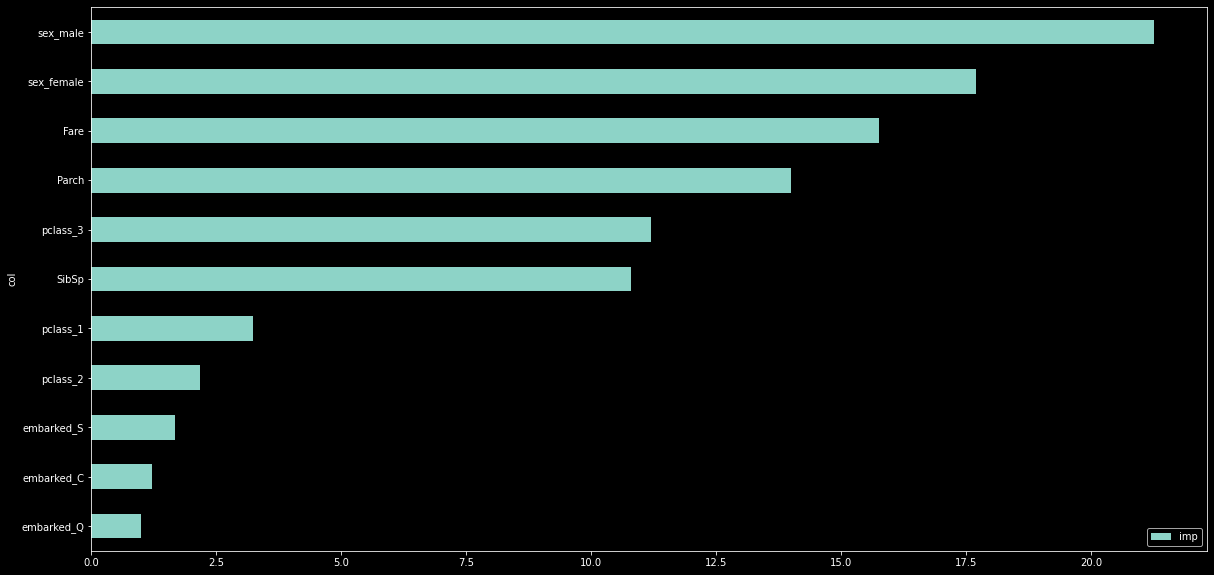

In [89]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

#### Why would you want feature importance?

Featrue importance shows how much each feature contributed to the model.

You could take this information and remove features which don't contribute much to reduce dimenstionality (and save compute).

You could improve features which don't offer much to the overall model.

Or you could improve features which offer more to the model. In this case, there aren't many ways you could improve sex as it's already a binary.

Feature importance figures also show people who may not be familiar with the problem what features of their data are most important when it comes to making predictions with machine learning models.

## Precision and Recall

Precision and recall are two metrics which are used for cases where you have have an imbalanced classification problem.

For example, you may have 100,000 people and only 1 of them gets a certain disease. If your model predicts that all people don't have the disease, it only misses 1 in 100,000 so its accuracy is 99.999%. But this isn't really helpful.

This is where precision an recall come in.

**Recall** = a metric which measures a models ability to find all the relevant cases in a dataset.

Recall would be the models ability to find the 1 person in 100,000 who has the disease.

**Precision** = a metric which measures a models ability to correctly identify only relevant instances.

In our example, Precision would be if the model found the 1 person who had the disease, did they actually have the disease.

Combining the precision and recall, gives an **F1 score.**

These metrics will all fall between 0 and 1, with a higher value being better.

Although, they don't necessarily need to come into play for our Titantic problem, they're worth remembering for your future work.

In [90]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Precision: 0.8286662683284687
Recall: 0.6833382352941176
F1: 0.7489789466084935
AUC: 0.8842839467480982


Recall is low, this means there's a higher amount of false negatives (predicting Did not survive when it was actually Survived).

Precision is higher therefore there's less false positives (predicting Survived, when it was actually Did not survive).

**Challenge:** What are some ways to visualise precision and recall? 
*Hint:* You may want to look into what a confusion matrix is, you can find much more information in this blog post: [Beyond Accuracy: Precision and Recall](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

## Submission
Let's use the model with the highest cross-validation accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [91]:
# We need our test dataframe to look like this one
X_train.head()

,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,0,71.2833,1,0,0,1,0,1,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,0,53.1000,0,0,1,1,0,1,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,1


In [92]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [93]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [94]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [95]:
# Let's look at test, it should have one hot encoded columns now
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,embarked_C,embarked_Q,embarked_S,sex_female,sex_male,pclass_1,pclass_2,pclass_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


The columns in `test` have been converted to the same format at `df_con_enc`. Now we can make predictions on the `test` dataframe columns we built a model on.

We can find the columns we made predictions on with `X_train.columns`.

In [96]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['SibSp', 'Parch', 'Fare', 'embarked_C', 'embarked_Q', 'embarked_S',
       'sex_female', 'sex_male', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')

In [97]:
# Make a prediction using the CatBoost model on the wanted columns
predictions = catboost_model.predict(test[wanted_test_columns])

In [98]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [99]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [100]:
# What does our submission have to look like?
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


We need our `submission` dataframe to look like the `gender_submisison` dataframe, so we'll turn the `Survived` column into integers.

In [101]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [102]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [103]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [104]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('catboost_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [105]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("catboost_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### Now submit your .csv to Kaggle! 

https://www.kaggle.com/c/titanic/submit

## Possible Extensions

These are all possible options to improve this pipeline. I'd suggest starting with the feature engineering (improving and manipulating the existing data) first.

* What can you do with the `Age` feature?
    * How would fill up all the missing values?
    * You may want to look into the `interpolate()` function of Pandas for this
<br>
<br>
2. What can you do with the `Name` feature?
    * What titles did the passengers have? Did this influence their survival?
<br>
<br>
3. What can you do with the `Cabin` feature?
    * Is there a way to see whether they had a cabin or not?
<br>
<br>
4. Can you combine the `SibSp` and `Parch` features to see if the person was alone or not?
<br>
<br>
5. Could you do a PCA/feature analysis to see what features are more important than others?
    * Does removing the less important model features improve the model?
<br>
<br>
7. The models take a bunch of hyperparameters but we've mostly used the default settings, is there a way to find which hyperparameters are best to use?
    * Tip: Check out the `CatBoost` with Python tutorial and the [hyperopt library](https://github.com/hyperopt/hyperopt) to see if you can improve the CatBoost model

    

## References and Learn More

* [Sklearn Classification Notebook by Daniel Furasso](https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb) - Daniel has done some epic work showing how you can take a bigger dataset, clean it up and perform some similar classification work from scratch. It would be a great next step after going through this one.
<br>

* [Encoding categorical features in Python blog post by Practical Python Business](http://pbpython.com/categorical-encoding.html) - this blog post sheds some great light on how to deal with categorical features in Python. The rest of the website contains plenty more great information for using Python in a business environment.
<br>

* [CatBoost Python tutorial on GitHub](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) - the tutorial is based on the Titanic Dataset and has some great tricks to improve the results in this notebook.
<br>

* [Shap library](https://github.com/slundberg/shap) - a great (and beautiful) alternative to viewing feature importance. Can you use this to improve on the feature importance graphics?